In [3]:
import pandas as pd
rain = pd.read_csv("rain.csv")

In [3]:
rain.head()

,Cardiff,Stornoway,Oxford,Armagh
1853,NaN,NaN,57.7,53.0
1854,NaN,NaN,37.5,69.8
1855,NaN,NaN,53.4,50.2
1856,NaN,NaN,57.2,55.0
1857,NaN,NaN,61.3,64.6


<AxesSubplot:>

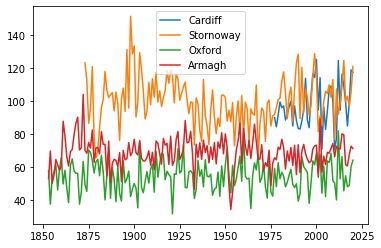

In [4]:
rain.plot()

In [5]:
temp = pd.read_csv('cetml1659on.txt',               # file name
                    skiprows = 6,                   # skip first 6 rows of header
                    delim_whitespace = True,        # whitespace separated columns
                    na_values = ["-99.9","-99.99"]) # Transform to NaNs negative numbers 

In [6]:
temp.head()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,YEAR
1659,3.0,4.0,6.0,7.0,11.0,13.0,16.0,16.0,13.0,10.0,5.0,2.0,8.87
1660,0.0,4.0,6.0,9.0,11.0,14.0,15.0,16.0,13.0,10.0,6.0,5.0,9.10
1661,5.0,5.0,6.0,8.0,11.0,14.0,15.0,15.0,13.0,11.0,8.0,6.0,9.78
1662,5.0,6.0,6.0,8.0,11.0,15.0,15.0,15.0,13.0,11.0,6.0,3.0,9.52
1663,1.0,1.0,5.0,7.0,10.0,14.0,15.0,15.0,13.0,10.0,7.0,5.0,8.63


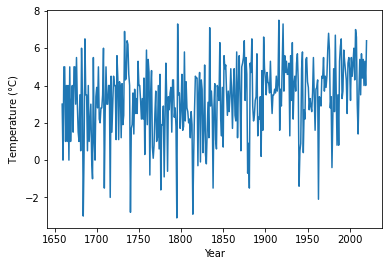

In [7]:
# a line plot of the January temperature over time
year_plot = temp['JAN'].plot(xlabel='Year', ylabel="Temperature ($\degree$C)")

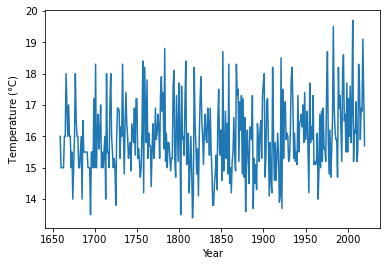

In [8]:
# a line plot of the July temperature over time
year_plot = temp['JUL'].plot(xlabel='Year', ylabel="Temperature ($\degree$C)")

## Seaborn

In [4]:
import seaborn as sns
sns.set_theme()

There are three major kinds of visualisation that you may want to use:

**Plotting relationships between variables in the data set**
 - This is showing how a change in one variable affects another variable. For example it could be scatter plot of how age and weight are related or a line plot of the change in temperature over time.
 
**Plotting the distribution of variables**
 - This is usually about how many of each value you have and how they are spread out. For example it could be a histogram of the spread of marks for a class of students or the ages of people in a country.
 
**Seeing how the data varies by category**
 - Categories in your data can be used in conjunction with both the methods described above but sometimes splitting your data by category and looking at each separately is a good choice. For example it could be a bar chart of how much each country spent on foreign aid.

In [6]:
tips = pd.read_csv('tips.csv')

In [8]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


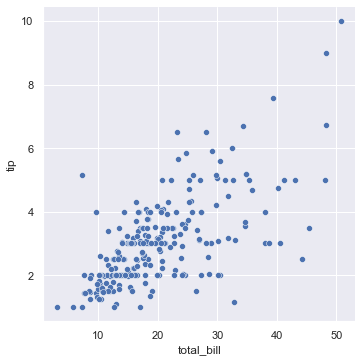

In [12]:
# The data argument should be the entire DataFrame and the x and y arguments should be the names of the columns to plot.
# So, to plot the values of tips against the total bill, we do:

sns.relplot(data=tips, x='total_bill', y='tip')

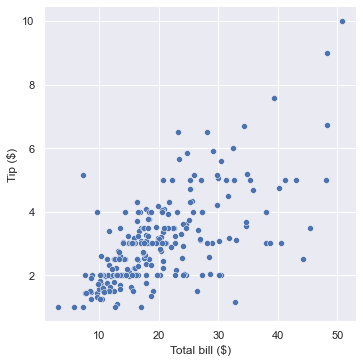

In [14]:
# By default it creates a scatter plot and uses the column names as axis labels. To set the axis labels to 
# something more useful, you can call set_axis_labels() on the object returned by relplot():

g = sns.relplot(data=tips, x="total_bill", y="tip")
g.set_axis_labels("Total bill ($)", "Tip ($)")

seaborn provides a bunch of different dimensions onto which you can map your data:

 - x=: see above
 - y=: see above
 - hue=: assign a different colour depending on the value. If the variable is numerical then it will vary the colour smoothly, if it is categorical then it will assign discrete colours to each category.
 - size=: vary the size of the marker depending on the value
 - style=: use a different marker type (e.g. ▲, ◆, ●, ◼) for the variable. Only makes sense for discrete variables.
 - row= and col=: for discrete variables, draw a separate subplot along a row or column for each category
 
If you have multiple dimensions to visualise, you can therefore plot up to 7 dimensional data. Here's an example using 5 dimensions for different variables:

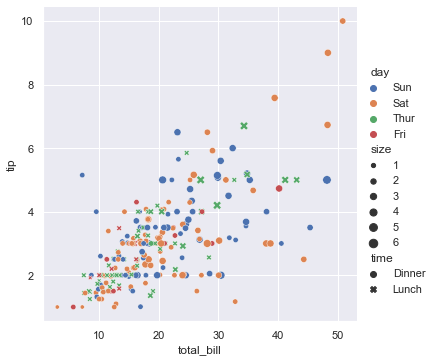

In [15]:
sns.relplot(data=tips, x='total_bill', y='tip', hue='day', size='size', style='time')

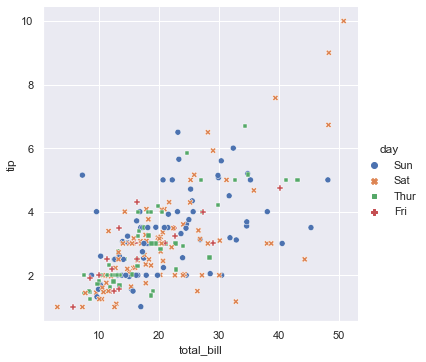

In [16]:
# Removing the clutter for better visualization.

sns.relplot(data=tips, x='total_bill', y='tip', hue='day', style='day')

## Ploting Distribuitions

seaborn provides a function for investigating the distribution of a variable called displot which works in a similar way to relplot. You pass the data frame you want to visualise and then start specifying the dimensions that you want to show.

In [11]:
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


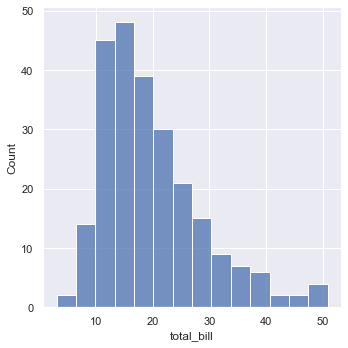

In [7]:
# To show a histogram of the total bill.
sns.displot(data=tips, x="total_bill")

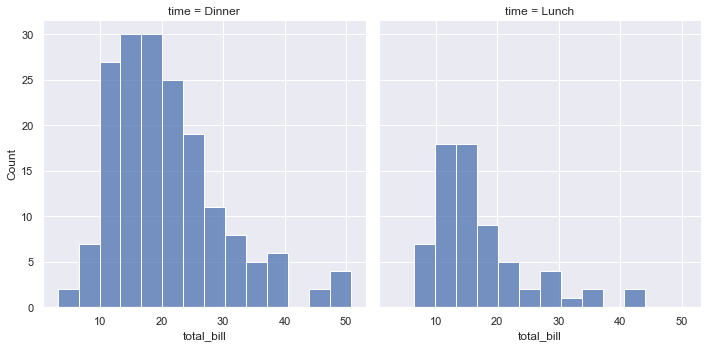

In [9]:
sns.displot(data=tips, x="total_bill", col='time')

Since displot shows the count of the values in each bin by default, the first thing that you would conclude is that there are more dinner data than lunch. If this is the story you are exploring then it's all good. However, we want to show how the distribution varies from lunch to dinner. To have it ignore the absolute values of the counts and to instead normalise the counts within each category, you can set common_norm=False which allows each subset to normalise individually:

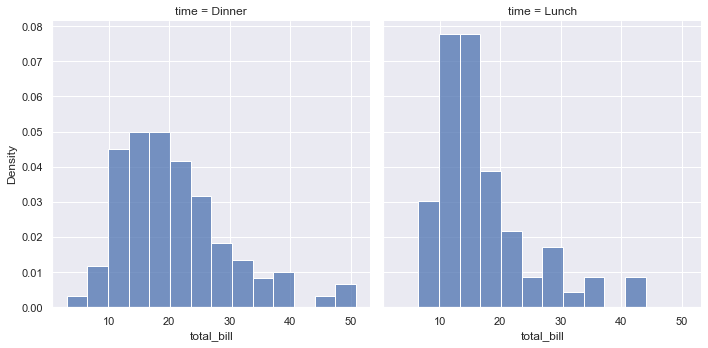

In [26]:
sns.displot(data=tips, x="total_bill", col="time", stat="density", common_norm=False)

Plotting them side-by-side makes it difficult to compare the point at which the peak happens in each data set. Do they align or are they shifted?  To solve this, we can plot the two overlaid by using the hue semantic instead of the col:

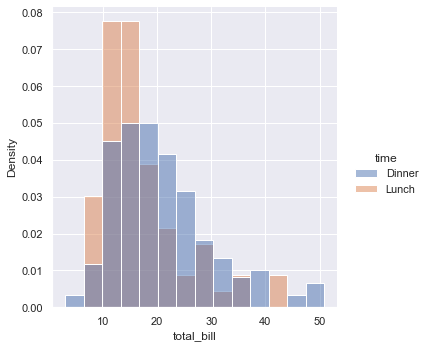

In [27]:
sns.displot(data=tips, x="total_bill", hue="time", stat="density", common_norm=False)

To simplify the view down further, you can smooth the bins by applying a "kernel density estimation" which allows you to turn it into a line graph:

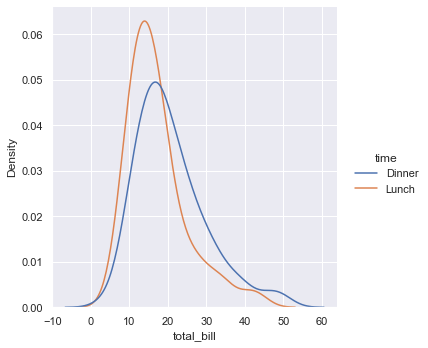

In [28]:
sns.displot(data=tips, x='total_bill', hue='time', kind='kde', common_norm=False)

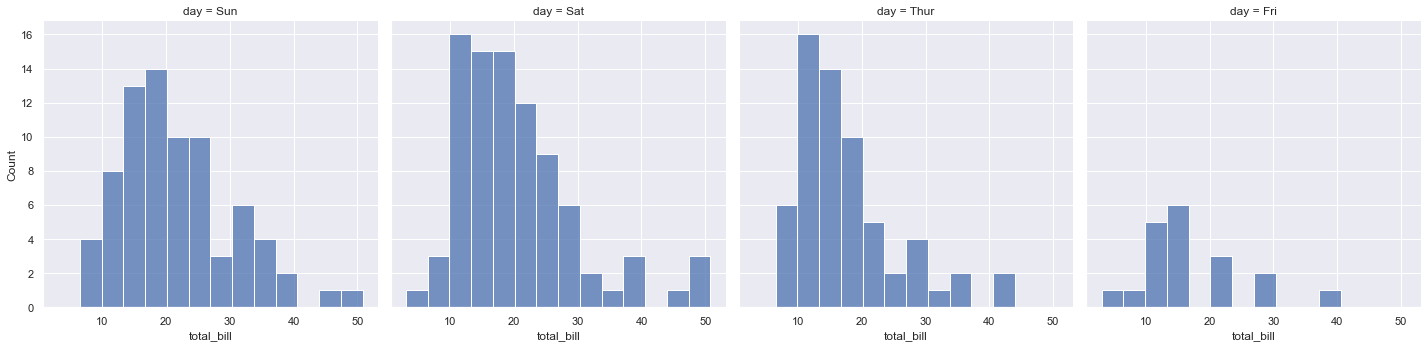

In [40]:
sns.displot(data=tips, x="total_bill", col='day')

In [15]:
tips.sort_values('total_bill')

,total_bill,tip,sex,smoker,day,time,size
67,3.07,1.00,Female,Yes,Sat,Dinner,1
92,5.75,1.00,Female,Yes,Fri,Dinner,2
111,7.25,1.00,Female,No,Sat,Dinner,1
172,7.25,5.15,Male,Yes,Sun,Dinner,2
149,7.51,2.00,Male,No,Thur,Lunch,2
...,...,...,...,...,...,...,...
182,45.35,3.50,Male,Yes,Sun,Dinner,3
156,48.17,5.00,Male,No,Sun,Dinner,6
59,48.27,6.73,Male,No,Sat,Dinner,4
212,48.33,9.00,Male,No,Sat,Dinner,4


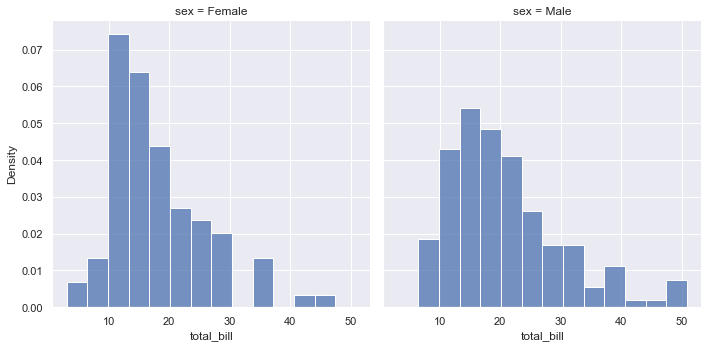

In [35]:
sns.displot(data=tips, x="total_bill", col='sex',stat="density", common_norm=False)

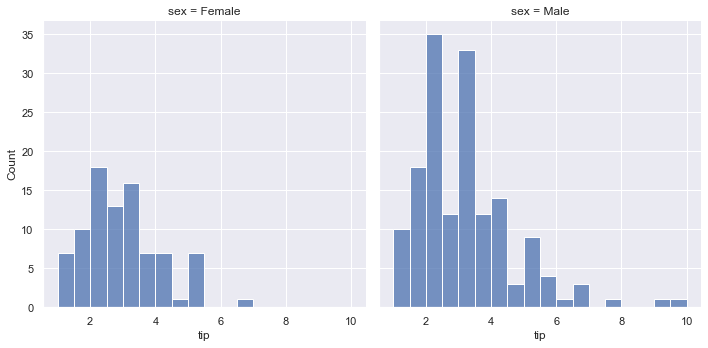

In [17]:
sns.displot(data=tips, x="tip", col='sex')

In [33]:
tips['bill_per_person'] = tips['total_bill']/tips['size']

Investigate how the time of day affects how much each person spends on average.

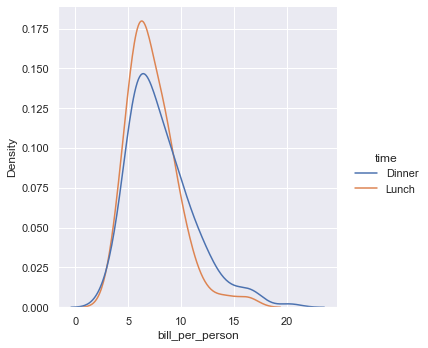

In [34]:
sns.displot(data=tips, x='bill_per_person', hue='time', kind='kde', common_norm=False)

## Plotting Categorical Data

The categorical variables in our data set are day and time. If we wanted to see how the total bill depended on the day of the week, we could do the following:

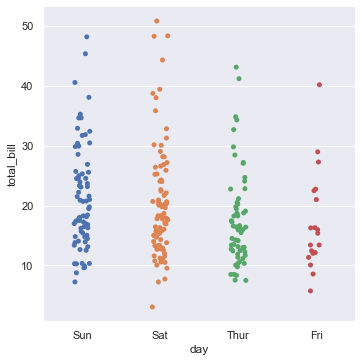

In [36]:
sns.catplot(data=tips, x='day', y='total_bill')

While the day of week is a categorical variable, it also has an understood common ordering to it where we would expect the days to presented in that order. We can specify the ordering with the order parameter:

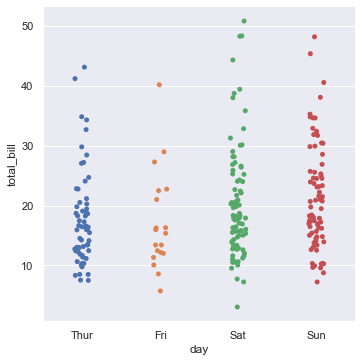

In [38]:
sns.catplot(data=tips, x='day', y='total_bill', order=['Thur','Fri','Sat','Sun'])

When looking for averages something like a box plot might be better. Pass the argument kind="box" to do this:

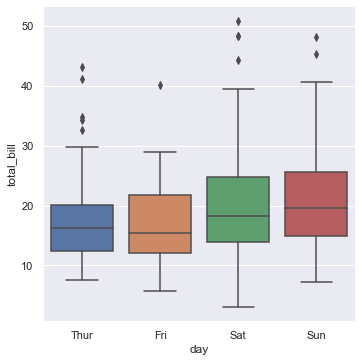

In [41]:
sns.catplot(data=tips, x='day', y='total_bill', order=['Thur','Fri','Sat','Sun'], kind='box')

There seems to be a trend towards larger total bills at the weekend. Investigate whether this is due to a larger average spend per person or due to a larger average group size.

See if using kind="violin" instead of "box" presents your data any better.

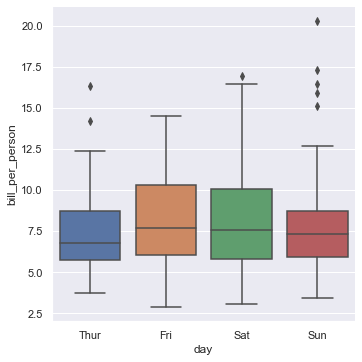

In [43]:
sns.catplot(data=tips, x='day', y='bill_per_person', order=['Thur','Fri','Sat','Sun'], kind = 'box')

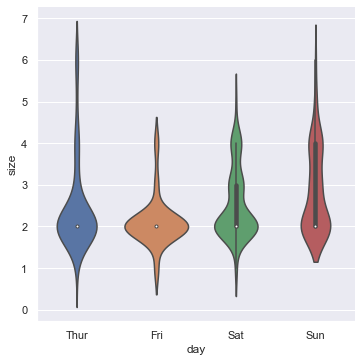

In [46]:
sns.catplot(data=tips, x='day', y='size', order=['Thur','Fri','Sat','Sun'], kind = 'violin')